# 03 Momentum agent baseline

#### 👉Sometimes there are easier paths than RL

#### 👉 In the `MountainCar` environment the best policy is *just follow the momentum:*
- accelerate right, when the car is moving to the right velocity > 0
- accelerate left, when the car is moving to the left velocity <= 0

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [3]:
import gym
env = gym.make('MountainCar-v0', render_mode = "rgb_array")
env._max_episode_steps = 1000

## Momentum agent 🤖

In [4]:
from momentum_agent import MomentumAgent
agent = MomentumAgent(env)

from loops import evaluate
n_episodes = 1000
rewards, max_positions = evaluate(agent, env, n_episodes)

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\Ploita\anaconda3\envs\HandsOnRL\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|██████████| 1000/1000 [00:02<00:00, 437.14it/s]


## And the success rate is... great!

In [5]:
n_completed = sum([1 if m > 0.5 else 0 for m in max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

1000 success out of 1000 attempts


## Let's see how far we got in each attempt

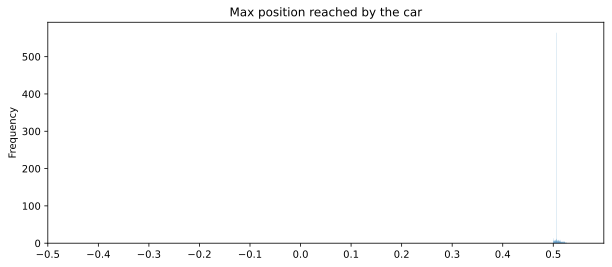

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Max position reached by the car")    
ax.set(xlim=(-0.5, .6), xticks=np.arange(-0.5, 0.6, 0.1))
pd.Series(max_positions).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

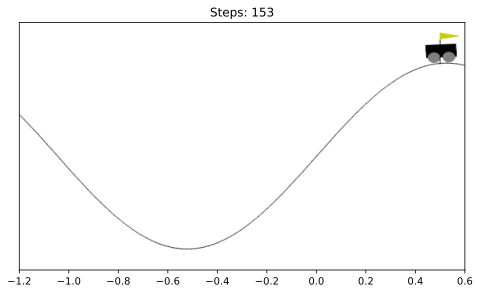

In [12]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

from viz import show_video

show_video(agent, env, sleep_sec=0.01)

## And plot the policy 🎨

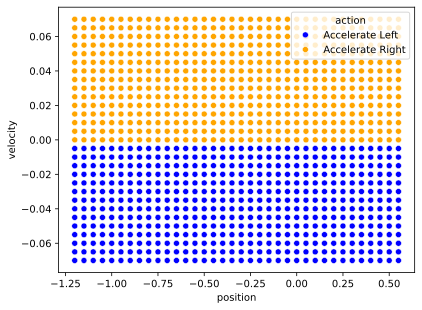

,position,velocity,action
0,-1.20,-0.070,Accelerate Left
1,-1.20,-0.065,Accelerate Left
2,-1.20,-0.060,Accelerate Left
3,-1.20,-0.055,Accelerate Left
4,-1.20,-0.050,Accelerate Left
...,...,...,...
1039,0.55,0.050,Accelerate Right
1040,0.55,0.055,Accelerate Right
1041,0.55,0.060,Accelerate Right
1042,0.55,0.065,Accelerate Right


In [13]:
import numpy as np
from viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)
plot_policy(agent, positions, velocities)